In [146]:
import pandas as pd

In [147]:
df_time = pd.read_csv('time_series_60min_singleindex.csv')

In [148]:
df_time.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [149]:
df = df_time[['utc_timestamp', 'DE_solar_generation_actual']]
df_solar = df.copy()
df_solar.head()

,utc_timestamp,DE_solar_generation_actual
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,NaN
2,2015-01-01T01:00:00Z,NaN
3,2015-01-01T02:00:00Z,NaN
4,2015-01-01T03:00:00Z,NaN


taking data related to Germany

In [150]:
df_solar.rename(columns={'utc_timestamp': 'ds', 'DE_solar_generation_actual': 'y'}, inplace=True)
df_solar.head()

,ds,y
0,2014-12-31T23:00:00Z,NaN
1,2015-01-01T00:00:00Z,NaN
2,2015-01-01T01:00:00Z,NaN
3,2015-01-01T02:00:00Z,NaN
4,2015-01-01T03:00:00Z,NaN


In [151]:
df_solar['ds'] = pd.to_datetime(df_solar['ds']).dt.tz_localize(None)
df_solar.head()

,ds,y
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,NaN
3,2015-01-01 02:00:00,NaN
4,2015-01-01 03:00:00,NaN


In [152]:
df_solar['y'].interpolate(method='linear', inplace=True)
df_solar.head()

,ds,y
0,2014-12-31 23:00:00,NaN
1,2015-01-01 00:00:00,NaN
2,2015-01-01 01:00:00,NaN
3,2015-01-01 02:00:00,NaN
4,2015-01-01 03:00:00,NaN


In [153]:
from prophet import Prophet

# Train Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True)
model.fit(df_solar)

# Generate forecasts
forecast = model.predict(df_solar)

# Extract Prophet components
df_features = forecast[['ds', 'yhat', 'trend', 'weekly', 'yearly', 'additive_terms']]


21:49:10 - cmdstanpy - INFO - Chain [1] start processing
21:49:35 - cmdstanpy - INFO - Chain [1] done processing


In [154]:
df_timeseries = pd.merge(df_solar, df_features, on='ds', how='inner')


In [155]:
df_weather = pd.read_csv('weather_data.csv')

columns = ['utc_timestamp', 'DE_temperature', 
                    'DE_radiation_direct_horizontal', 'DE_radiation_diffuse_horizontal']

df_weather = df_weather[columns]
df_weather.head()

,utc_timestamp,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
0,1980-01-01T00:00:00Z,-1.261,0.0,0.0
1,1980-01-01T01:00:00Z,-1.414,0.0,0.0
2,1980-01-01T02:00:00Z,-1.571,0.0,0.0
3,1980-01-01T03:00:00Z,-1.760,0.0,0.0
4,1980-01-01T04:00:00Z,-1.995,0.0,0.0


In [156]:
df_pv = pd.read_csv('ninja_pv_wind_profiles_singleindex.csv')
columns = ['time', 'DE_pv_national_current']

df_pv = df_pv[columns]
df_pv.head()

,time,DE_pv_national_current
0,1980-01-01T00:00:00Z,0.0
1,1980-01-01T01:00:00Z,0.0
2,1980-01-01T02:00:00Z,0.0
3,1980-01-01T03:00:00Z,0.0
4,1980-01-01T04:00:00Z,0.0


In [157]:
df_weather.rename(columns={'utc_timestamp': 'ds'}, inplace=True)
df_weather['ds'] = pd.to_datetime(df_weather['ds']).dt.tz_localize(None)

In [158]:
df_pv.rename(columns={'time': 'ds'}, inplace=True)
df_pv['ds'] = pd.to_datetime(df_pv['ds']).dt.tz_localize(None)

In [159]:
df_merged = pd.merge(df_timeseries, df_weather, on='ds', how='inner')
df_merged.head()

,ds,y,yhat,trend,weekly,yearly,additive_terms,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
0,2014-12-31 23:00:00,NaN,-3896.701250,4270.479018,75.025170,-3611.098725,-8167.180267,-0.940,0.0,0.0
1,2015-01-01 00:00:00,NaN,-3819.567978,4270.266397,71.222647,-3610.713246,-8089.834376,-0.981,0.0,0.0
2,2015-01-01 01:00:00,NaN,-3751.287459,4270.053777,67.121628,-3610.328672,-8021.341236,-1.035,0.0,0.0
3,2015-01-01 02:00:00,NaN,-3811.401048,4269.841157,62.767217,-3609.945013,-8081.242204,-1.109,0.0,0.0
4,2015-01-01 03:00:00,NaN,-3861.453414,4269.628536,58.205609,-3609.562281,-8131.081951,-1.166,0.0,0.0


In [160]:
df = pd.merge(df_merged, df_pv, on='ds', how='inner')
df.head()

,ds,y,yhat,trend,weekly,yearly,additive_terms,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_pv_national_current
0,2014-12-31 23:00:00,NaN,-3896.701250,4270.479018,75.025170,-3611.098725,-8167.180267,-0.940,0.0,0.0,0.0
1,2015-01-01 00:00:00,NaN,-3819.567978,4270.266397,71.222647,-3610.713246,-8089.834376,-0.981,0.0,0.0,0.0
2,2015-01-01 01:00:00,NaN,-3751.287459,4270.053777,67.121628,-3610.328672,-8021.341236,-1.035,0.0,0.0,0.0
3,2015-01-01 02:00:00,NaN,-3811.401048,4269.841157,62.767217,-3609.945013,-8081.242204,-1.109,0.0,0.0,0.0
4,2015-01-01 03:00:00,NaN,-3861.453414,4269.628536,58.205609,-3609.562281,-8131.081951,-1.166,0.0,0.0,0.0


In [161]:
df.drop(columns=['yhat'], inplace=True)
df.head()

,ds,y,trend,weekly,yearly,additive_terms,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_pv_national_current
0,2014-12-31 23:00:00,NaN,4270.479018,75.025170,-3611.098725,-8167.180267,-0.940,0.0,0.0,0.0
1,2015-01-01 00:00:00,NaN,4270.266397,71.222647,-3610.713246,-8089.834376,-0.981,0.0,0.0,0.0
2,2015-01-01 01:00:00,NaN,4270.053777,67.121628,-3610.328672,-8021.341236,-1.035,0.0,0.0,0.0
3,2015-01-01 02:00:00,NaN,4269.841157,62.767217,-3609.945013,-8081.242204,-1.109,0.0,0.0,0.0
4,2015-01-01 03:00:00,NaN,4269.628536,58.205609,-3609.562281,-8131.081951,-1.166,0.0,0.0,0.0


In [162]:
df['Year'] = pd.to_datetime(df['ds']).dt.year
df['Month'] = pd.to_datetime(df['ds']).dt.month
df['Day'] = pd.to_datetime(df['ds']).dt.day
df['Hour'] = pd.to_datetime(df['ds']).dt.hour
df['DayOfWeek'] = pd.to_datetime(df['ds']).dt.dayofweek

In [163]:
df.head()

,ds,y,trend,weekly,yearly,additive_terms,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_pv_national_current,Year,Month,Day,Hour,DayOfWeek
0,2014-12-31 23:00:00,NaN,4270.479018,75.025170,-3611.098725,-8167.180267,-0.940,0.0,0.0,0.0,2014,12,31,23,2
1,2015-01-01 00:00:00,NaN,4270.266397,71.222647,-3610.713246,-8089.834376,-0.981,0.0,0.0,0.0,2015,1,1,0,3
2,2015-01-01 01:00:00,NaN,4270.053777,67.121628,-3610.328672,-8021.341236,-1.035,0.0,0.0,0.0,2015,1,1,1,3
3,2015-01-01 02:00:00,NaN,4269.841157,62.767217,-3609.945013,-8081.242204,-1.109,0.0,0.0,0.0,2015,1,1,2,3
4,2015-01-01 03:00:00,NaN,4269.628536,58.205609,-3609.562281,-8131.081951,-1.166,0.0,0.0,0.0,2015,1,1,3,3


In [164]:
df_time.head()

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [165]:
columns = ['utc_timestamp', 'DE_solar_capacity']

df_time = df_time[columns]
df_time.head()

,utc_timestamp,DE_solar_capacity
0,2014-12-31T23:00:00Z,37248.0
1,2015-01-01T00:00:00Z,37248.0
2,2015-01-01T01:00:00Z,37248.0
3,2015-01-01T02:00:00Z,37248.0
4,2015-01-01T03:00:00Z,37248.0


In [167]:
df_time.rename(columns={'utc_timestamp': 'ds'}, inplace=True)
df_time['ds'] = pd.to_datetime(df_time['ds']).dt.tz_localize(None)
df = pd.merge(df, df_time, on='ds', how='left')
df.head()

,ds,y,trend,weekly,yearly,additive_terms,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_pv_national_current,Year,Month,Day,Hour,DayOfWeek,DE_solar_capacity
0,2014-12-31 23:00:00,NaN,4270.479018,75.025170,-3611.098725,-8167.180267,-0.940,0.0,0.0,0.0,2014,12,31,23,2,37248.0
1,2015-01-01 00:00:00,NaN,4270.266397,71.222647,-3610.713246,-8089.834376,-0.981,0.0,0.0,0.0,2015,1,1,0,3,37248.0
2,2015-01-01 01:00:00,NaN,4270.053777,67.121628,-3610.328672,-8021.341236,-1.035,0.0,0.0,0.0,2015,1,1,1,3,37248.0
3,2015-01-01 02:00:00,NaN,4269.841157,62.767217,-3609.945013,-8081.242204,-1.109,0.0,0.0,0.0,2015,1,1,2,3,37248.0
4,2015-01-01 03:00:00,NaN,4269.628536,58.205609,-3609.562281,-8131.081951,-1.166,0.0,0.0,0.0,2015,1,1,3,3,37248.0


In [168]:
# Drop rows where 'y' is NaN
df = df.dropna(subset=['y'])

In [169]:
df.drop(columns=['ds'], inplace=True)

In [170]:
df.head()

,y,trend,weekly,yearly,additive_terms,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal,DE_pv_national_current,Year,Month,Day,Hour,DayOfWeek,DE_solar_capacity
8,71.0,4268.778055,38.818420,-3608.040836,-874.576833,-1.692,0.4328,6.7680,0.005,2015,1,1,7,3,37248.0
9,773.0,4268.565435,33.913483,-3607.662900,2263.604618,-1.046,8.8773,51.9464,0.068,2015,1,1,8,3,37248.0
10,2117.0,4268.352814,29.070934,-3607.285956,4737.409351,0.072,34.1583,97.0929,0.158,2015,1,1,9,3,37248.0
11,3364.0,4268.140194,24.329682,-3606.910013,6142.233847,0.866,56.5458,120.2907,0.222,2015,1,1,10,3,37248.0
12,4198.0,4267.927574,19.725731,-3606.535083,6361.055137,1.493,62.8690,126.2112,0.239,2015,1,1,11,3,37248.0


In [171]:
y = df['y']                 # Target variable
X = df.drop(columns=['y'])  # Drop the target variable

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [173]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (35053, 14)
Test set shape: (8764, 14)


<h2>XGBoost</h2>

In [174]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Convert data into DMatrix (optional, but efficient for XGBoost)
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# Define parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'max_depth': 6,
    'eta': 0.1,  # Learning rate
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Train model
num_round = 100
model = xgb.train(params, train_data, num_round)

# Predict
y_pred = model.predict(test_data)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

RMSE: 907.0997950008805


C:\Users\Qc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


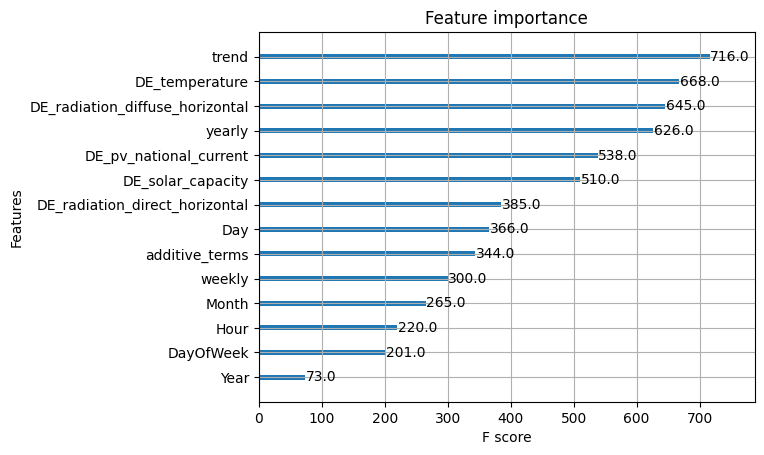

In [175]:
import matplotlib.pyplot as plt

xgb.plot_importance(model)
plt.show()